In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"/Volumes/Sagitarius/Datasets/penguins.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
print("Number of null values before dropping:")
print(df.isnull().sum())
df.dropna(inplace=True)
print("\nNumber of null values after dropping:")
print(df.isnull().sum())

Number of null values before dropping:
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Number of null values after dropping:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


<Axes: >

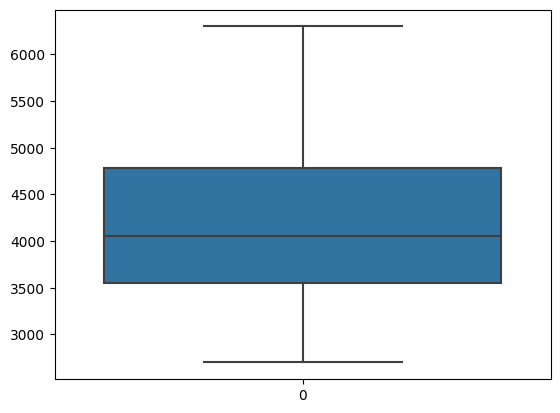

In [4]:
sns.boxplot(df['body_mass_g'])

<Axes: >

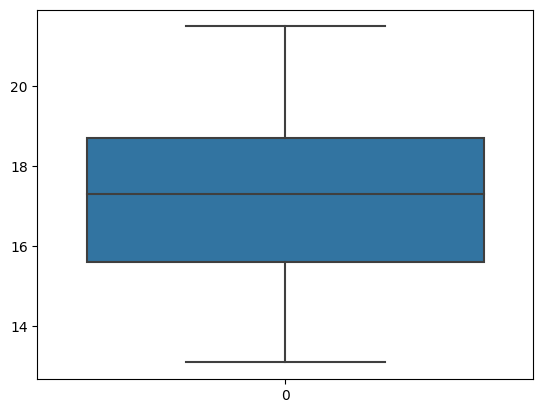

In [5]:
sns.boxplot(df['culmen_depth_mm'])

<Axes: >

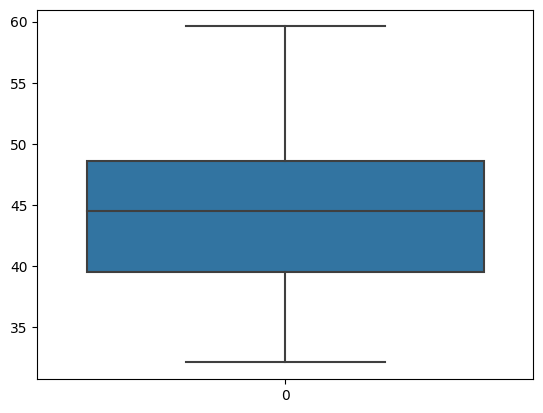

In [6]:
sns.boxplot(df['culmen_length_mm'])

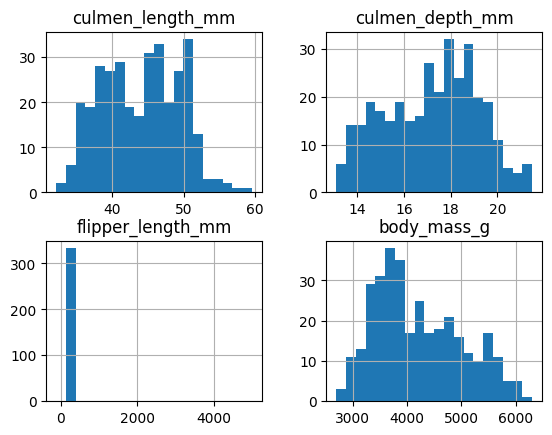

In [7]:
df.hist(bins=20)
plt.show()

In [9]:
df['sex'] = df['sex'].map({'MALE':0, 'FEMALE':1})
scaler = StandardScaler()
sc_feature = scaler.fit_transform(df.drop('sex', axis = 1))
sc_feature

array([[-0.89772327,  0.77726336, -0.12689335, -0.57223347],
       [-0.82426521,  0.11703673, -0.10787184, -0.50992298],
       [-0.67734909,  0.42175671, -0.07363312, -1.19533834],
       ...,
       [ 1.17746691, -0.74633656,  0.02908304,  1.920186  ],
       [ 0.22251214, -1.20341653, -0.00895998,  1.23477065],
       [ 1.08564434, -0.5431899 , -0.00515568,  1.4840126 ]])

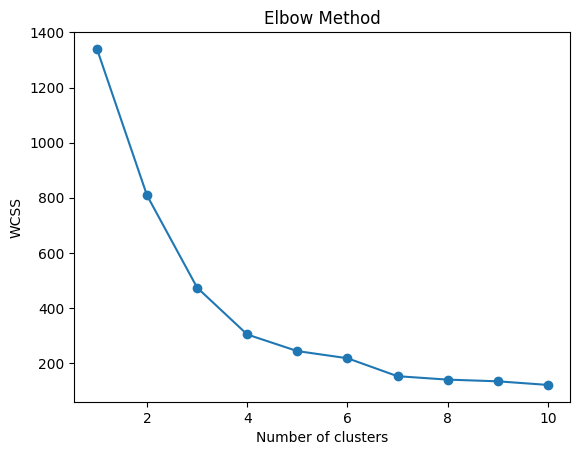

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=9)
    kmeans.fit(sc_feature)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4, random_state=9)
kmeans.fit(sc_feature)
df['cluster'] = kmeans.labels_
df['cluster'].unique()

array([0, 2, 3, 1], dtype=int32)

[]

<Figure size 1500x2000 with 0 Axes>

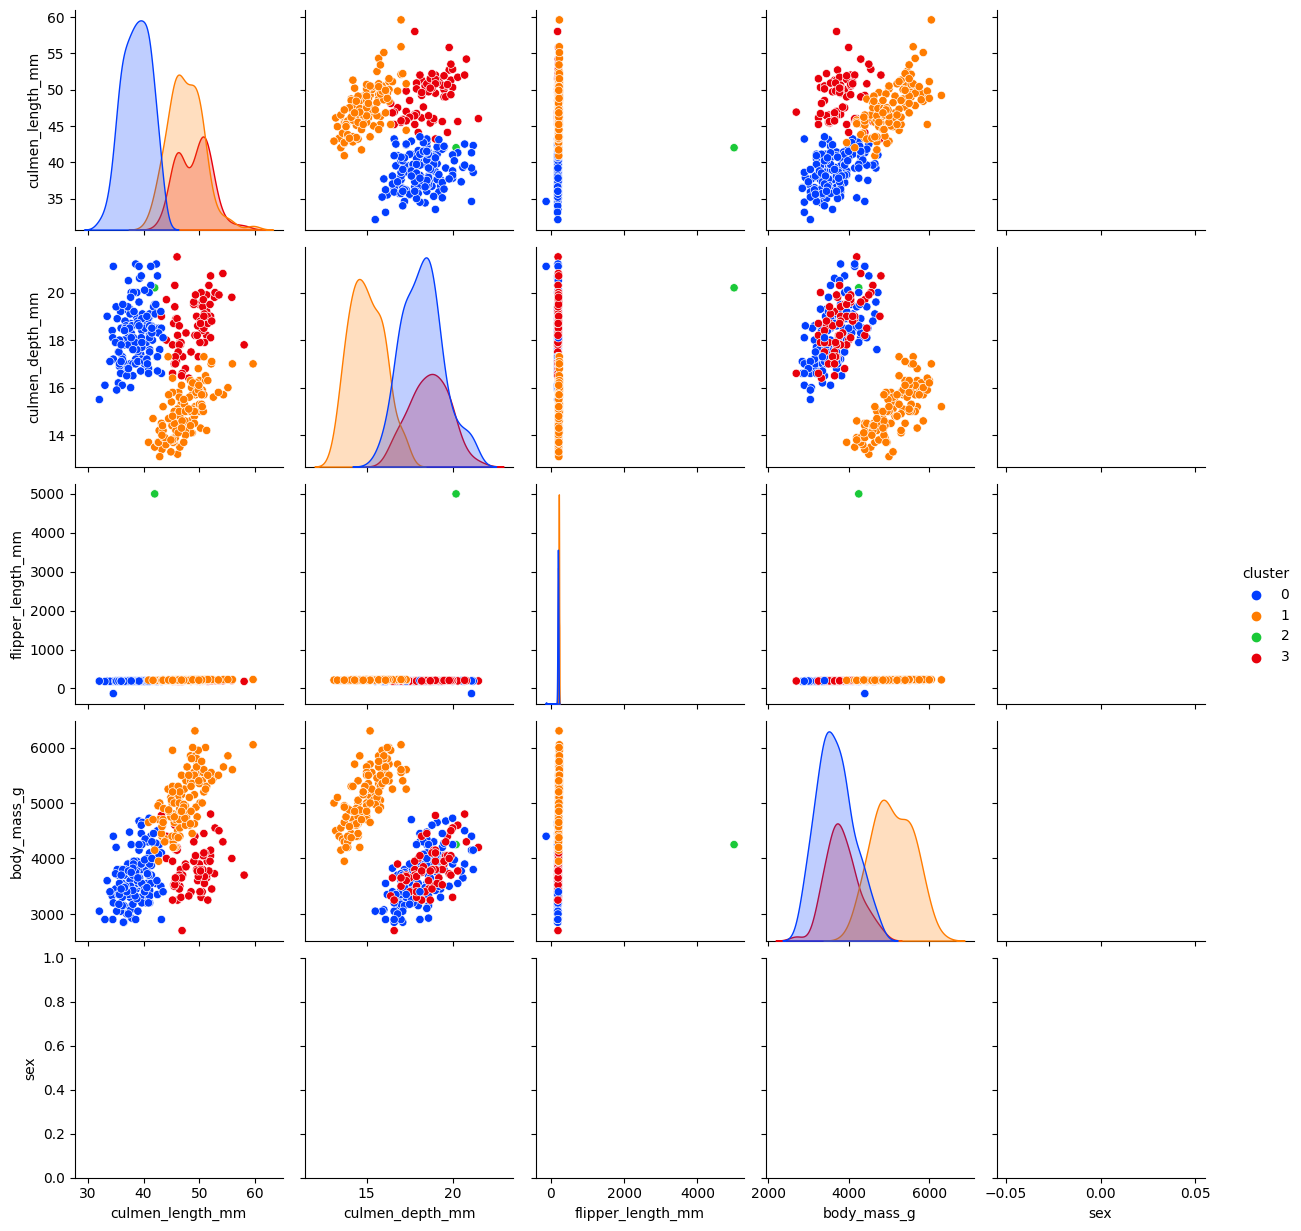

In [14]:
plt.figure(figsize=(15,20))
sns.pairplot(df, hue = 'cluster', palette='bright')
plt.plot()

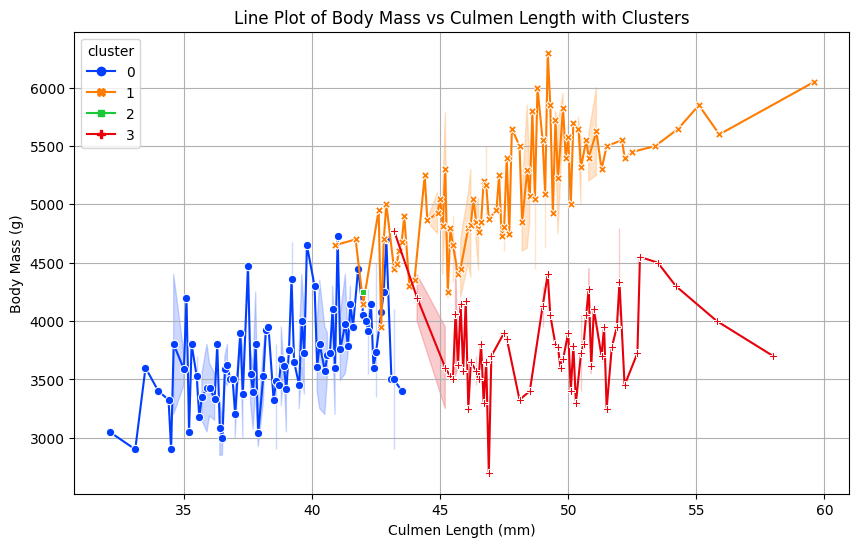

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='culmen_length_mm', y='body_mass_g', hue='cluster', style='cluster', markers=True, dashes=False, palette='bright')
plt.title('Line Plot of Body Mass vs Culmen Length with Clusters')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

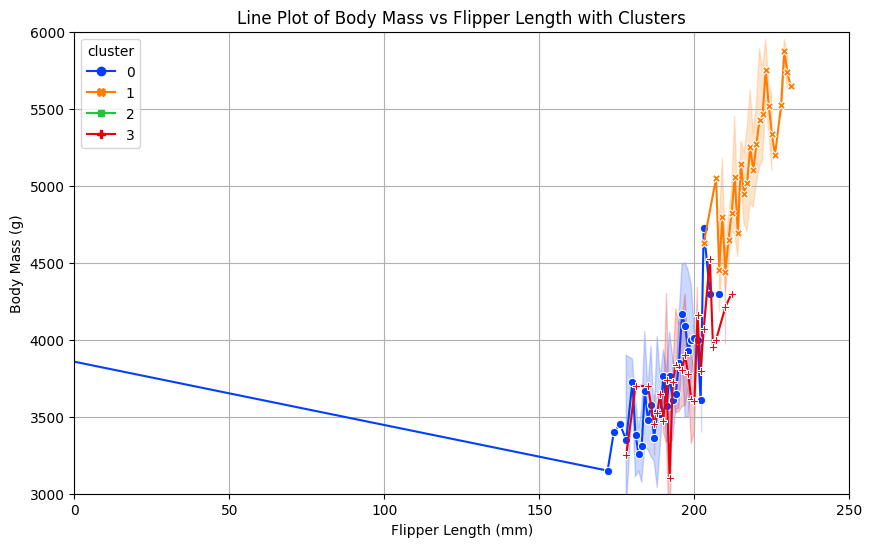

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='cluster', style='cluster', markers=True, dashes=False, palette='bright')
plt.title('Line Plot of Body Mass vs Flipper Length with Clusters')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)

# Set the limits to zoom in (adjust the limits as needed)
plt.xlim(0, 250)  # Example limits for flipper_length_mm
plt.ylim(3000, 6000)  # Example limits for body_mass_g

plt.show()


In [17]:
# Check initial data
print("Initial Data:")
print(df)

# Function to calculate modified Z-score
def modified_z_score(data):
    median = np.median(data)
    mad = np.median(np.abs(data - median))
    modified_z_scores = 0.6745 * (data - median) / mad
    return modified_z_scores

# Calculate modified Z-score for 'body_mass_g' column
df['modified_z_score'] = modified_z_score(df['body_mass_g'])

# Identify outliers
threshold = 3.5
df['is_outlier'] = df['modified_z_score'].abs() > threshold

# Review outliers
outliers = df[df['is_outlier']]

# Print intermediate steps for debugging
print("\nModified Z-scores:")
print(df[['body_mass_g', 'modified_z_score']])
print("\nOutliers:")
print(outliers)


Initial Data:
     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex  \
0                39.1             18.7              181.0       3750.0  NaN   
1                39.5             17.4              186.0       3800.0  NaN   
2                40.3             18.0              195.0       3250.0  NaN   
4                36.7             19.3              193.0       3450.0  NaN   
5                39.3             20.6              190.0       3650.0  NaN   
..                ...              ...                ...          ...  ...   
338              47.2             13.7              214.0       4925.0  NaN   
340              46.8             14.3              215.0       4850.0  NaN   
341              50.4             15.7              222.0       5750.0  NaN   
342              45.2             14.8              212.0       5200.0  NaN   
343              49.9             16.1              213.0       5400.0  NaN   

     cluster  
0          0  
1      